# linear models, optimization

In this seminar you will implement a simple linear classifier using numpy and your brain.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import random
from IPython import display
from sklearn import datasets, preprocessing

In [3]:
def visualize(X, y, w, loss, n_iter):
    """
    A function to visualize the decision boundary and loss.
    You don't need to change anything here.
    """
    
    plt.clf()
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())

### Exercise 1: linearly separable

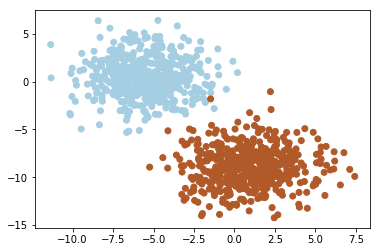

In [4]:
X, y = sklearn.datasets.make_blobs(n_samples=1024, n_features=2, centers=2, 
                                   cluster_std=2, shuffle=False, random_state=16)

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

### 1.1

First, write a function that predicts class given X.

Classifying a sample should not be much harder that computing sign of dot product.

In [5]:
def classify(X_, w_):
    """
    Given feature matrix X [n_samples,2] and weight vector w[2],
    return an array of +1 or -1 predictions"""
    # your code goes here
    return np.sign(np.dot(X_, w_))

In [20]:
assert np.linalg.norm(classify(np.array([[-5, -5], [10, 10]]),
                               [1,0]) - np.array([-1, 1])) < 1e-6

### 1.2

Next, implement a loss function 

The loss you should try to minimize is the Hinge Loss.

$$ L =  {1 \over N} \sum_i max(0,1-y_i \cdot \vec w \vec x_i) $$

In [6]:
def compute_loss(X_, y_, w_):
    """
    Given feature matrix X [n_samples,2], target vector [n_samples] of +1/-1,
    and weight vector w [2], compute scalar loss function using numpy and formula above.
    """
    # your code goes here
    return np.mean(np.maximum(0, 1-y_*np.dot(X_, w_)))

In [21]:
assert np.linalg.norm(compute_loss(np.array([[-5, -5], [5, 5], [10, -10]]),
                                   [-1,-1, 1], [1,1]) - 4.0) < 1e-6

### 1.3

Finally, implement a function to compute the gradient over the parameters

In [7]:
def compute_grad(X_, y_, w_):
    return np.sum((-X_*y_[:, np.newaxis])[y_*np.dot(X_, w_) < 1], axis=0)

def _compute_grad(X_, y_, w_):
    """
    Given feature matrix X [n_samples,2], target vector [n_samples] of +1/-1,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    """
    # your code goes here
    grad = 0
    for (x_,y_) in zip(X_,y_):
        v = y_*np.dot(w_,x_)
        grad += 0 if v > 1 else -y_*x_
    return grad

In [22]:
assert np.linalg.norm(compute_grad(np.array([[-5, -5], [5, 5], [10, -10]]), 
                                   np.array([-1,-1, 1]), [1,1]) - np.array([-5, 15])) < 1e-6

### Training
One you got the functions right, it's time to train the model!

You can see the example of correct output below this cell before you run it.

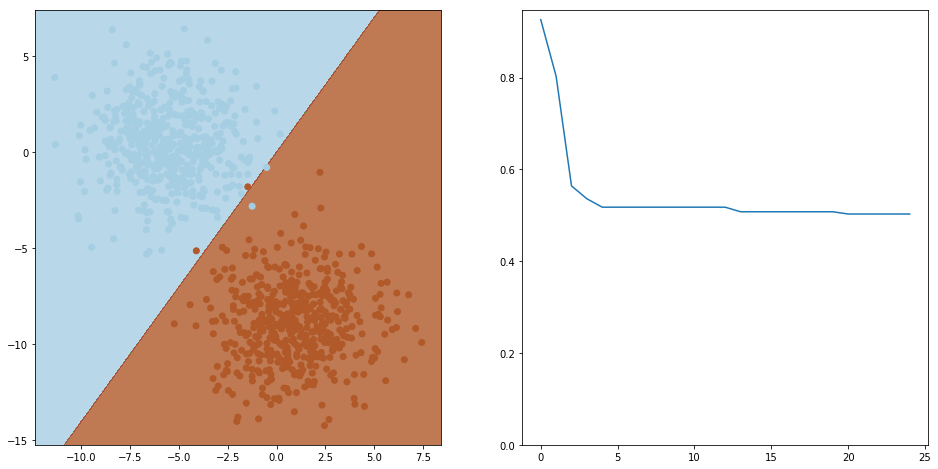

In [8]:
w = np.array([1,0]) # random initial parameters

alpha = 0.01 # learning rate
n_iter = 25
batch_size = 16

loss = np.zeros(n_iter)
plt.figure(figsize=(16,8))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

visualize(X, y, w, loss, n_iter)
plt.clf()

### Exercise 2: linearly non-separable

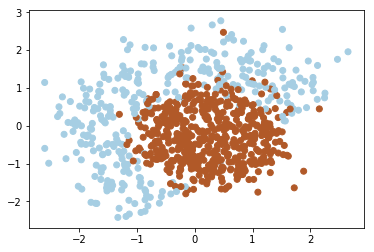

In [9]:
def make_nonlinear_dataset(samples=1024):
    (X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
    ind = np.logical_or(y==1, X[:,1] > X[:,0] - 0.5)
    X = X[ind,:]
    m = np.array([[1, 1], [-2, 1]])
    X = preprocessing.scale(X)
    y = y[ind]
    y = 2*y - 1
    return X, y

X, y = make_nonlinear_dataset()

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

Now the data is not linearly separable anymore. In order to separate the points, we will introduce some non-linear features into our data representation. Consider the following function:

In [24]:
def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X              # base features (x1, x2)
    X_[:,2:4] = X**2           # quadratic features (x1^2, x2^2)
    X_[:,4] = X[:,0] * X[:,1]  # multiplicative features (x1*x2)
    X_[:,5] = 1                # bias
    return X_

In [25]:
print(X.shape, expand(X).shape)

(830, 2) (830, 6)


### 2.1

Apply the feature transformation function 'expand' to the data inside 'classify', 'compute_loss' and 'compute_grad' functions

In [26]:
def classify(X_, w_):
    """
    Given feature matrix X [n_samples,2] and weight vector w[6],
    return an array of +1 or -1 predictions"""
    # your code goes here
    return np.sign(np.dot(expand(X_), w_))

def compute_loss(X_, y_, w_):
    """
    Given feature matrix X [n_samples,2], target vector [n_samples] of +1/-1,
    and weight vector w [6], compute scalar loss function using numpy and formula above.
    """
    return np.mean(np.maximum(0, 1-y_*np.dot(expand(X_), w_)))

def compute_grad(X_, y_, w_):
    return np.sum((-expand(X_)*y_[:, np.newaxis])[y_*np.dot(expand(X_), w_) < 1], axis=0)

### 2.2

Train your new model. You may want to experiment with learning rate, batch_size and number of iteratons 

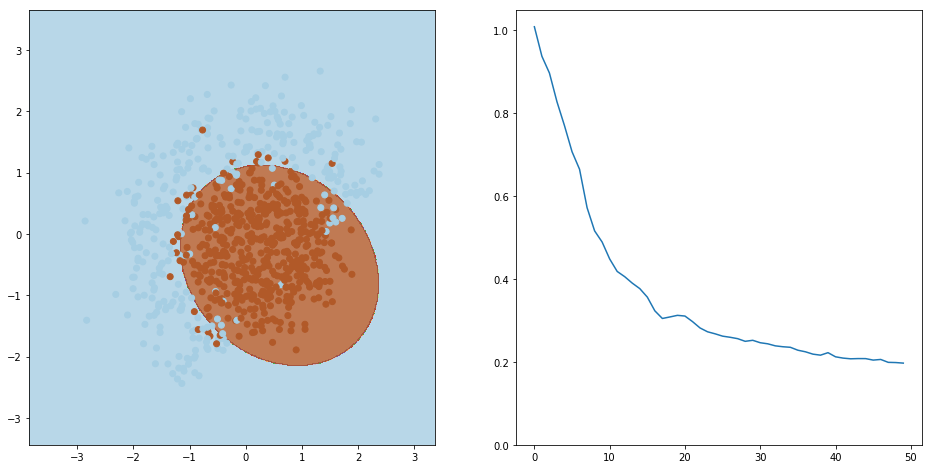

In [30]:
w = np.array([1,0,0,0,1,1]) # random initial parameters

alpha = 0.01 # learning rate
n_iter = 50
batch_size = 16

loss = np.zeros(n_iter)
plt.figure(figsize=(16,8))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

visualize(X, y, w, loss, n_iter)
plt.clf()

### 2.3

$$ L =  {1 \over N} \sum_i max(0,1-y_i \cdot \vec w \vec x_i) $$

Finally, implement gradient descent with moomentum. Gradient descent with momentum remembers the update $\Delta w$ at each iteration and determines the next update as a linear combination of the gradient and the previous update:

$$\Delta w := \mu \Delta w - \alpha \nabla L(w)$$
$$w := w + \Delta w$$

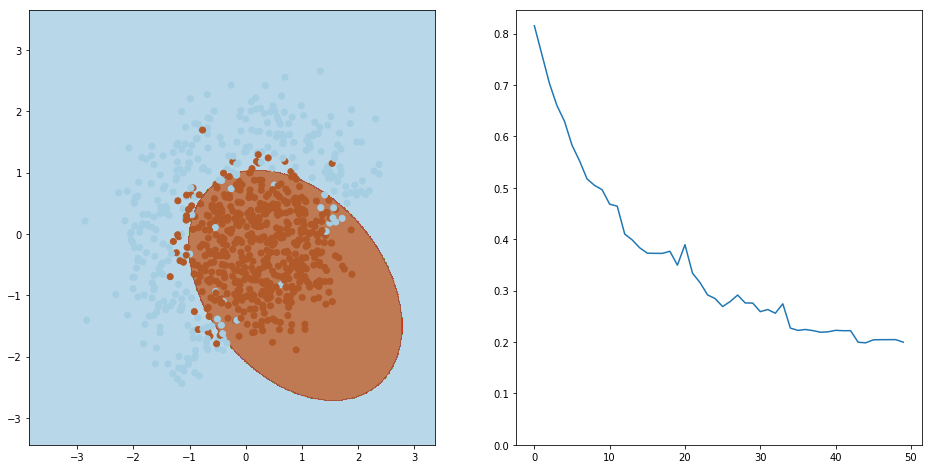

In [28]:
w = np.array([1,0,0,0,0,0])
delta_w = np.array([0,0,0,0,0,0])

alpha = 0.05 # learning rate
mu    = 0.05 # momentum

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(16,8))

for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    delta_w = mu * delta_w - alpha * compute_grad(X[ind,:], y[ind], w)
    w = w + delta_w

visualize(X, y, w, loss, n_iter)
plt.clf()

# Bonus quest 

Implement RMSPROP algorithm


In [ ]:
w = np.array([1,0,0,0,0,0])

alpha = 0.0 # learning rate
mean_squared_norm = 0.0 #moving average of gradient norm squared

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    <update w and anything else here>


visualize(X, y, w, loss, n_iter)
plt.clf()

Which optimization method you consider the best? Type your answer in the cell below